In [10]:
import os
import sys
from turtle import color
import numpy as np
from natsort import natsorted
import cv2 
import matplotlib.pyplot as plt

In [11]:
def load_npy(path):
    npy_list = []
    samples = os.listdir(path)

    for i, npy_path in enumerate(samples):
        print('\rnow loading npy files from {}: ({} / {})'.format(path, i + 1, len(samples)), end='')

        data_npy = np.load(os.path.join(path, npy_path))
        npy_list.append(data_npy)
    print(" ")
    return npy_list


def len_frame(npy_list):
    #가져온 npy파일로 프레임 길이를 세기 (frame, keypoit, channel) - .shape[0]
    whole_frame = []

    for i, one_npy in enumerate(npy_list):
        print('\rnow analizing npy files.... ({} / {})'.format(i + 1, len(npy_list)), end='')
        whole_frame.append(one_npy.shape[0])
    print("\n")
    return whole_frame


In [20]:
AUTSL_PATH = '/dataset/AUTSL'
KETI_PATH = '/dataset/KETI_SignLanguage/Keypoints-removal'

In [13]:
AUTSL_npy = load_npy(AUTSL_PATH + '/train_npy') + load_npy(AUTSL_PATH + '/test_npy') + load_npy(AUTSL_PATH + '/val_npy')
print("load success: {} has {} npy files.\n".format(AUTSL_PATH.split('/')[2], len(AUTSL_npy)))

now loading npy files from /dataset/AUTSL/train_npy: (28142 / 28142) 
now loading npy files from /dataset/AUTSL/test_npy: (3742 / 3742) 
now loading npy files from /dataset/AUTSL/val_npy: (4418 / 4418) 
load success: AUTSL has 36302 npy files.



In [21]:
KETI_npy = load_npy(KETI_PATH)
print("load success: {} has {} npy files.\n\n".format(KETI_PATH.split('/')[2], len(KETI_npy)))

now loading npy files from /dataset/KETI_SignLanguage/Keypoints-removal: (33517 / 33517) 
load success: KETI_SignLanguage has 33517 npy files.




In [15]:
AUTSL_frame = len_frame(AUTSL_npy)

now analizing npy files.... (36302 / 36302)



In [22]:
KETI_frame = len_frame(KETI_npy)

now analizing npy files.... (33517 / 33517)



In [23]:
#show result & draw plot
print("Analasis RESULT\n\n[DATASET: KETI]\n AVERAGE: {:.3f}\n VARIACE: {:.3f}\n STANDARD DEVIATION:{:.3f}\n MAX:{:.3f}\n________________________________________________________\n\n".format(
        np.mean(KETI_frame), np.var(KETI_frame), np.std(KETI_frame), np.max(KETI_frame)))

print("[DATASET: AUTSL]\n AVERAGE: {:.3f}\n VARIACE: {:.3f}\n STANDARD DEVIATION:{:.3f}\n MAX:{:.3f}".format(
    np.mean(AUTSL_frame), np.var(AUTSL_frame), np.std(AUTSL_frame), np.max(AUTSL_frame)))

Analasis RESULT

[DATASET: KETI]
 AVERAGE: 109.335
 VARIACE: 814.731
 STANDARD DEVIATION:28.543
 MAX:283.000
________________________________________________________


[DATASET: AUTSL]
 AVERAGE: 60.978
 VARIACE: 120.208
 STANDARD DEVIATION:10.964
 MAX:156.000


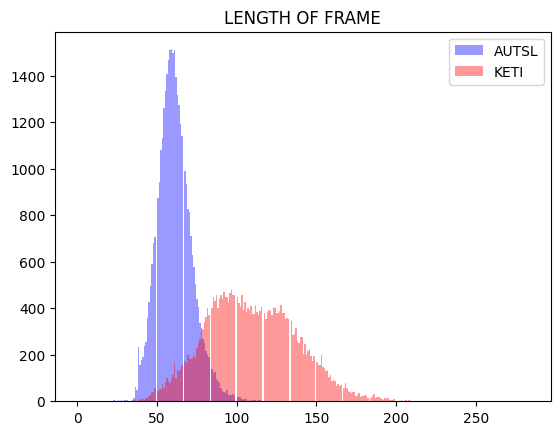

In [24]:
plt.title('LENGTH OF FRAME')
plt.hist(AUTSL_frame, color='blue', alpha=0.4, bins=300, range=[0, np.max(KETI_frame)], label='AUTSL', density=False)
plt.hist(KETI_frame, color='red', alpha=0.4, bins=300, range=[0, np.max(KETI_frame)], label='KETI', density=False)
plt.legend()
plt.savefig('histogram.png')
plt.show()